In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center dataset
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # find n principal components
        cov = np.cov(X.T)
        eigvecs, eigvals = la.eig(cov)
        idx = np.argsort(eigvals)[::-1]
        eigvecs = eigvecs.T[idx][:self.n_components]

        self.components = eigvecs.T

    def transform(self, X):
        # center data
        X = X - self.mean

        # project onto principal components
        projection = np.dot(X, self.components)
        return projection

In [3]:
iris = fetch_ucirepo(id=53) 
  
X = iris.data.features 
y = iris.data.targets

dataset = pd.concat((X, y), axis=1)
  
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
pca = PCA(2)
pca.fit(X)
X_projections = pca.transform(X)

Dataset shape before PCA: (150, 4)
Dataset shape before PCA: (150, 2)



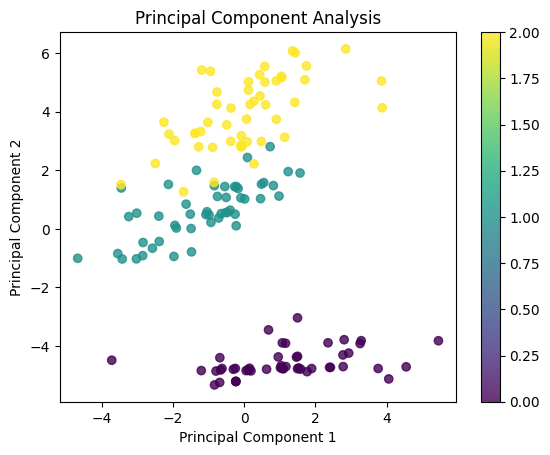

In [5]:
print(f"Dataset shape before PCA: {X.shape}")
print(f"Dataset shape after PCA: {X_projections.shape}\n")

pc1 = X_projections[:, 0]
pc2 = X_projections[:, 1]

labels, unique_labels = pd.factorize(np.array(y).reshape(-1))

plt.scatter(pc1, pc2, c=labels, alpha=0.8, cmap='viridis')
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show();